In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


pd.option_context('mode.use_inf_as_na', True)
pd.option_context('mode.use_inf_as_na', True)

In [2]:
pd.option_context('mode.use_inf_as_na', True)
pd.option_context('mode.use_inf_as_na', True)

## Reading the DataFrame

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.set_index('PassengerId', inplace=True)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [6]:
train_female = train_data.loc[train_data.Sex == "female"]["Survived"]
rate_women = round((sum(train_female)/len(train_female))*100,2)
print("% of women survived", rate_women)

% of women survived 74.2


In [7]:
train_male = train_data.loc[train_data.Sex == "male"]["Survived"]
rate_men = round((sum(train_male)/len(train_male))*100,2)
print("% of women survived", rate_men)

% of women survived 18.89


## EDA

In [8]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
category_column = train_data.select_dtypes(include=['object', 'category']).columns
train_data[category_column]

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
887,"Montvila, Rev. Juozas",male,211536,NaN,S
888,"Graham, Miss. Margaret Edith",female,112053,B42,S
889,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S


In [11]:
non_category_column = train_data.select_dtypes(exclude=['object', 'category']).columns
train_data[non_category_column]

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000
889,0,3,NaN,1,2,23.4500


In [12]:
# checking missing value
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
# checking % of missing value
round(((train_data.isnull().sum())/len(train_data.index))*100,4)

Survived     0.0000
Pclass       0.0000
Name         0.0000
Sex          0.0000
Age         19.8653
SibSp        0.0000
Parch        0.0000
Ticket       0.0000
Fare         0.0000
Cabin       77.1044
Embarked     0.2245
dtype: float64

In [14]:
# drop column where Nan more than 50%
train_data.dropna(thresh=len(train_data)/2,axis=1,inplace=True)

In [15]:
# removing rows where Nan present
train_data.dropna(axis=0,inplace=True)

In [16]:
(train_data.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [17]:
round(((train_data.isnull().sum())/len(train_data.index))*100,4)

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

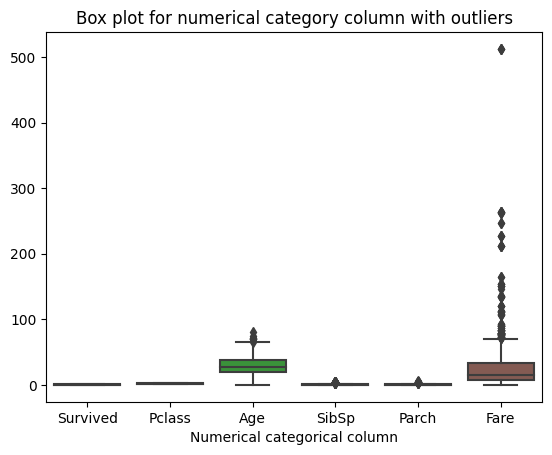

In [19]:
# check for outliers


sns.boxplot(data=train_data[non_category_column])
plt.title('Box plot for numerical category column with outliers')
plt.xlabel('Numerical categorical column')
plt.show()

In [20]:
# removing outliers
def removal_outliers(df):
    for col in df.columns:
        if (((df[col].dtype)=="float64") | ((df[col].dtype)=="int64")):
            print("Removing outlier of", col)
            percentile_low = df[col].quantile(0.1) 
            percentile_upper = df[col].quantile(0.75)
            iqr = percentile_upper - percentile_low
            upper_limit = percentile_upper + 1.5 * iqr
            lower_limit = percentile_low - 1.5 * iqr 
            df[col] = df[col][((df.loc[:, col]< upper_limit) & (df.loc[:, col]> lower_limit))]
            
        else:
            print(col, "Column is an object type")
            df[col]=df[col]
    return df

In [21]:
final_train = removal_outliers(train_data)

Removing outlier of Survived
Removing outlier of Pclass
Name Column is an object type
Sex Column is an object type
Removing outlier of Age
Removing outlier of SibSp
Removing outlier of Parch
Ticket Column is an object type
Removing outlier of Fare
Embarked Column is an object type


In [22]:
final_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,710.00000,677.000000,697.000000,617.000000
mean,0.404494,2.240169,29.50869,0.344165,0.352941,19.026803
std,0.491139,0.836854,14.29223,0.547735,0.651233,14.282146
min,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.00000,0.000000,0.000000,7.925000
50%,0.000000,2.000000,28.00000,0.000000,0.000000,13.000000
75%,1.000000,3.000000,38.00000,1.000000,1.000000,26.283300
max,1.000000,3.000000,71.00000,2.000000,2.000000,69.300000


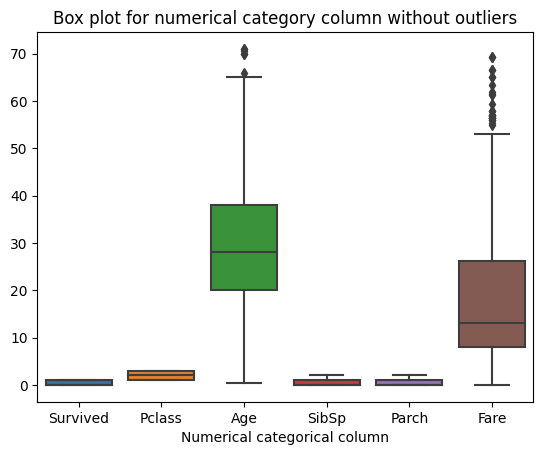

In [23]:
sns.boxplot(data=final_train[non_category_column])
plt.title('Box plot for numerical category column without outliers')
plt.xlabel('Numerical categorical column')
plt.show()

In [24]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Name      712 non-null    object 
 3   Sex       712 non-null    object 
 4   Age       710 non-null    float64
 5   SibSp     677 non-null    float64
 6   Parch     697 non-null    float64
 7   Ticket    712 non-null    object 
 8   Fare      617 non-null    float64
 9   Embarked  712 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 61.2+ KB


In [25]:
round(((final_train.isnull().sum())/len(train_data.index))*100,4)

Survived     0.0000
Pclass       0.0000
Name         0.0000
Sex          0.0000
Age          0.2809
SibSp        4.9157
Parch        2.1067
Ticket       0.0000
Fare        13.3427
Embarked     0.0000
dtype: float64

In [26]:
# replacing Nan values with respective median of the column
for col in final_train.columns:
    if final_train[col].isnull().sum()> 0:
        val_to_replace = final_train[col].median()
        final_train.fillna({col: val_to_replace}, inplace=True)
# checking for nan values
round(((final_train.isnull().sum())/len(train_data.index))*100,4)

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [27]:
# Removing column "Name" as PassengerId is tagged along 
final_train.drop(['Name', 'Ticket'],axis=1,inplace=True)

In [28]:
final_train.replace([np.inf, -np.inf], np.nan, inplace=True)

## Visualizing Numeric values

##  Univariate Analysis
* Categorical Variables
  1. Unordered - rank frequency variable
  2. Ordered - histogram, bar

Plotting graph with Survived 

In [29]:
def plot_with_y(df, var):
    for col in var:
        # Create a figure with 1 row and 2 columns for barplot and histplot
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        
        # Barplot on the first subplot
        sns.barplot(x='Survived', y=col, data=df, ax=axes[0], hue='Survived')
        axes[0].set_title(f'{col} vs Survived')

        sns.histplot(df[col], kde=True, ax=axes[1])  # KDE for distribution curve
        axes[1].set_title(f'{col} Distribution')
        
        plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


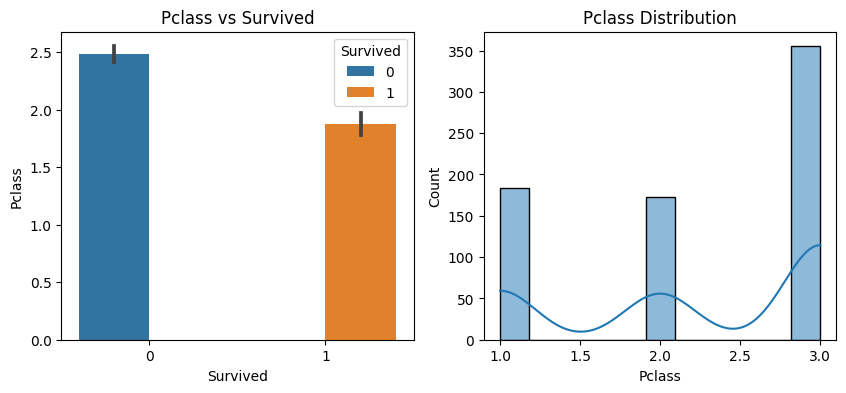

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


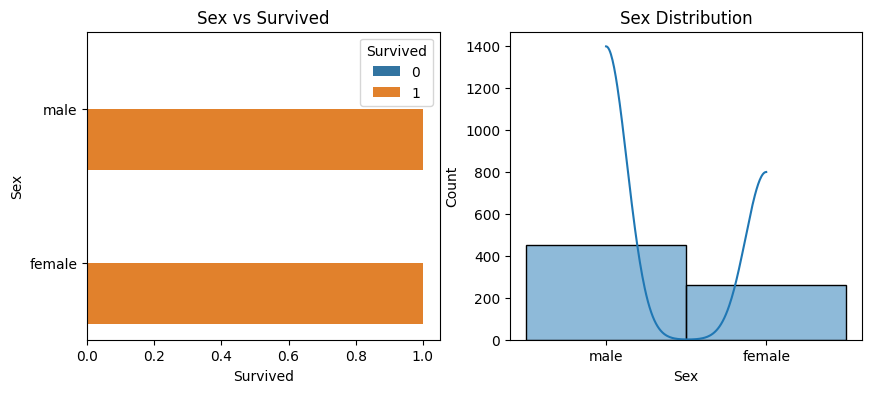

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


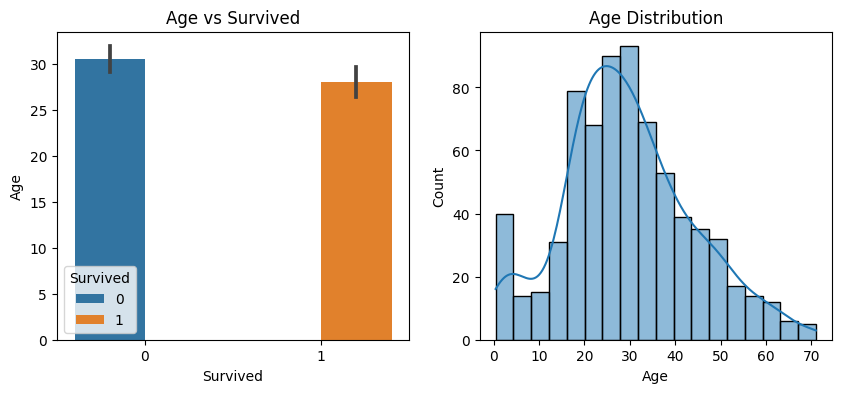

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


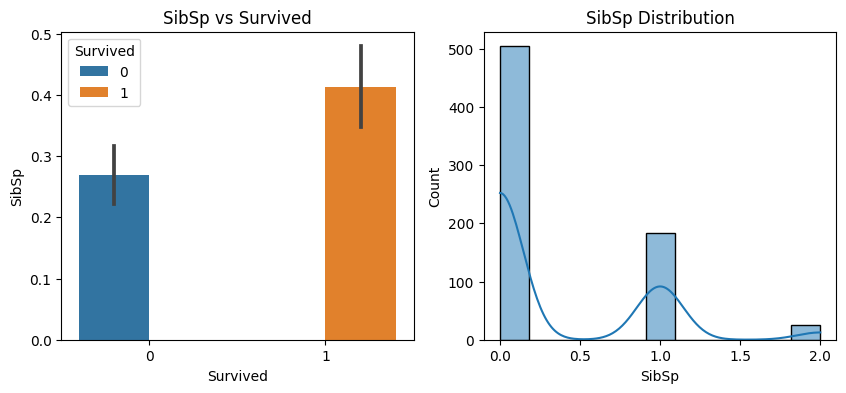

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


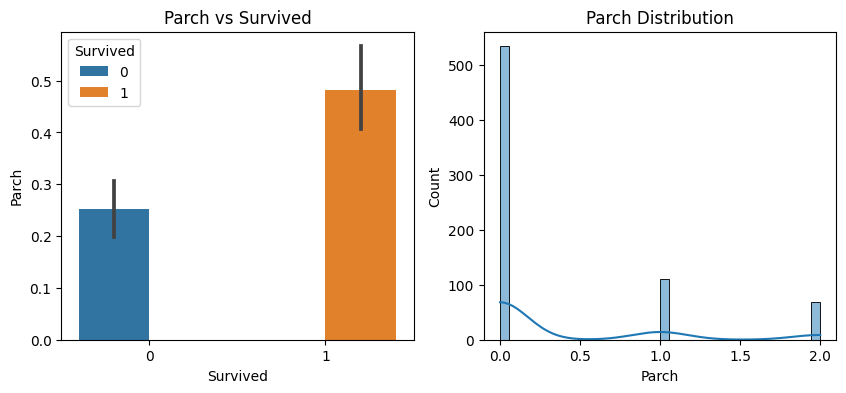

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


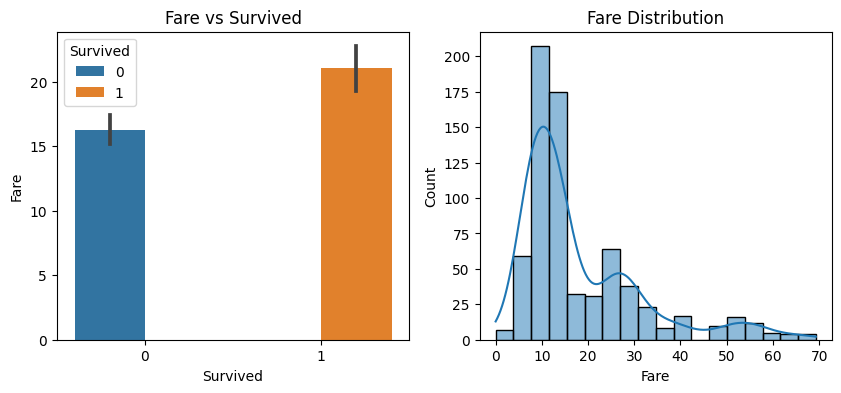

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


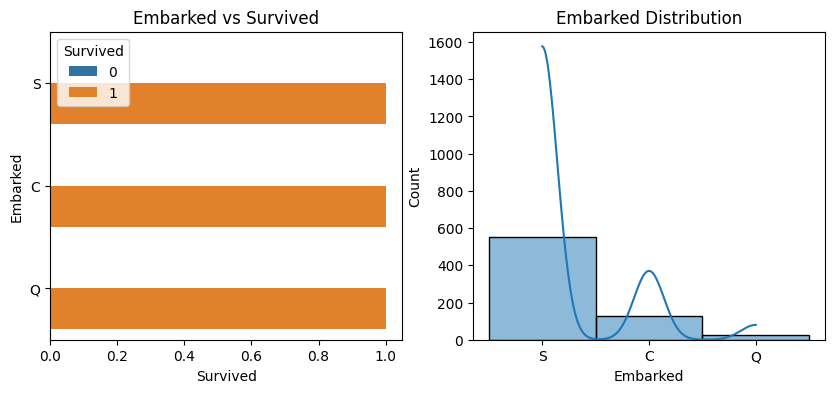

In [30]:
variable = list(final_train.columns)
variable.remove('Survived')
plot_with_y(final_train, variable)

## Bivariate Analysis

Text(0.5, 1.0, 'Box plot of Sex Vs Fare ')

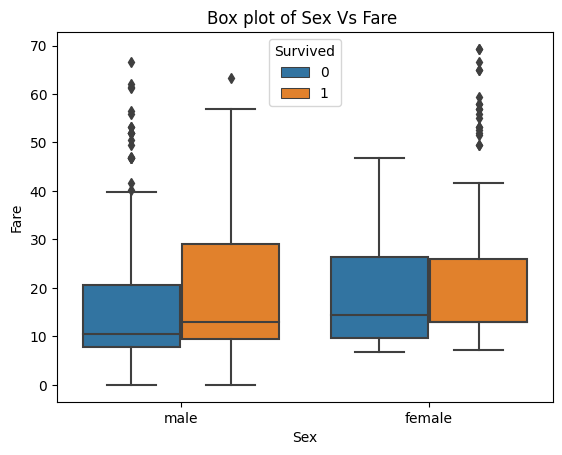

In [31]:
# categorical and continous
sns.boxplot(data = final_train, x='Sex', y='Fare', hue="Survived")
plt.title("Box plot of Sex Vs Fare ")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the mar

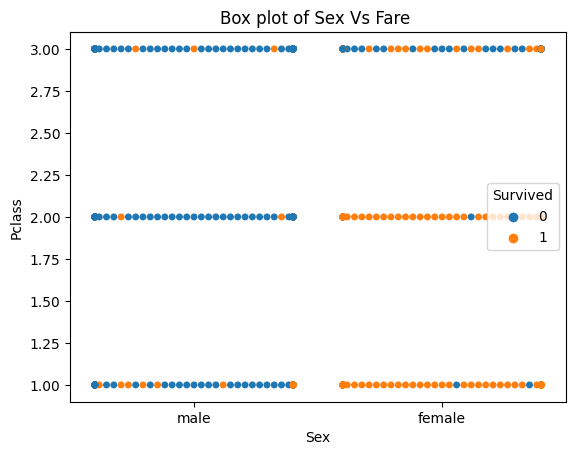

In [32]:
# categorical and continous
sns.swarmplot(data = final_train, x='Sex', y='Pclass', hue="Survived")
plt.title("Box plot of Sex Vs Fare ")
plt.show()

In [33]:
# summarize complete dataset wrt sex and Embarked
final_train.pivot_table(index="Sex", columns=["Embarked"], aggfunc="count")

Age          Fare          Parch          Pclass          SibSp      \
Embarked   C   Q    S    C   Q    S     C   Q    S      C   Q    S     C   Q   
Sex                                                                            
female    61  12  186   61  12  186    61  12  186     61  12  186    61  12   
male      69  16  368   69  16  368    69  16  368     69  16  368    69  16   

              Survived           
Embarked    S        C   Q    S  
Sex                              
female    186       61  12  186  
male      368       69  16  368

In [34]:
cross1 = pd.crosstab(index=[final_train.Parch], columns=final_train.SibSp,values=final_train.Fare,
                             aggfunc='mean')
cross2 = pd.crosstab(index=[final_train.Parch], columns=final_train.SibSp,values=final_train.Age,
                             aggfunc='mean')

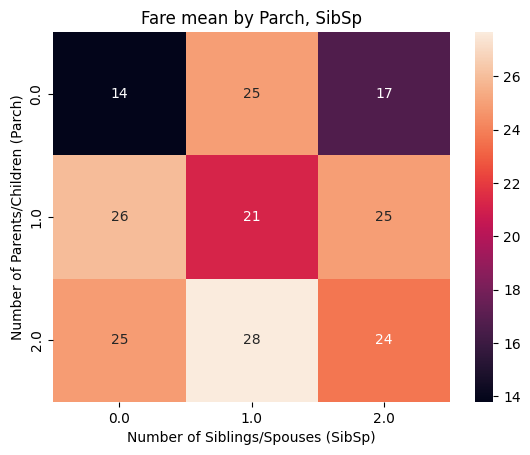

In [35]:
sns.heatmap(cross1, annot=True)
plt.title('Fare mean by Parch, SibSp')
plt.xlabel("Number of Siblings/Spouses (SibSp)")
plt.ylabel("Number of Parents/Children (Parch)")
plt.show()

Fare minimum for no parents/children or sibblings and maximum for 2 parents and siblings/spouse on board

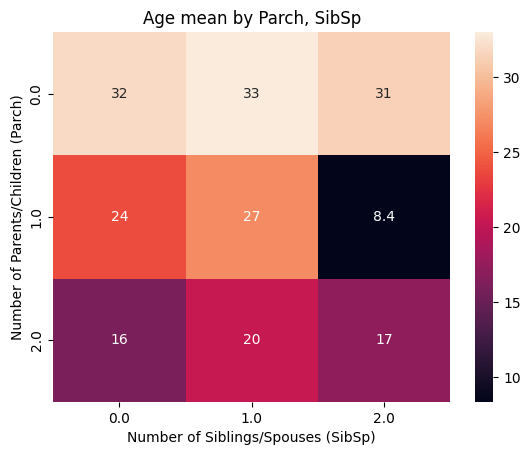

In [36]:
sns.heatmap(cross2, annot=True)
plt.title('Age mean by Parch, SibSp')
plt.xlabel("Number of Siblings/Spouses (SibSp)")
plt.ylabel("Number of Parents/Children (Parch)")
plt.show()

Maximum mean age of no Parents/children and minimum mean age of 1 parents/children and 2 siblings/spouses

In [37]:
train_crosstab = pd.crosstab(index=[final_train.Pclass, final_train.Parch],
                             columns=final_train.SibSp,
                             values=final_train.Fare,
                             aggfunc='mean')
train_crosstab1 = pd.crosstab(index=[final_train.Pclass, final_train.Parch],
                             columns=final_train.SibSp,
                             values=final_train.Age,
                             aggfunc='mean')

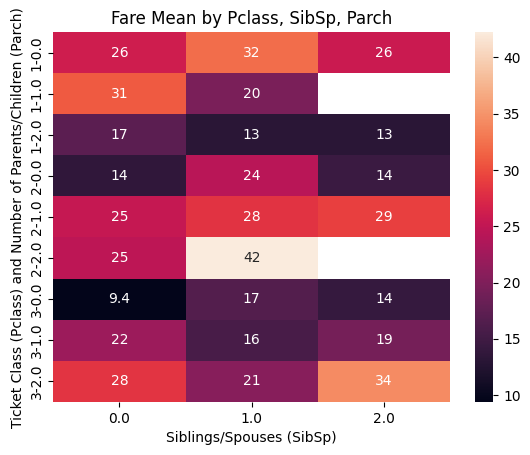

In [38]:
sns.heatmap(train_crosstab, annot=True)
plt.title("Fare Mean by Pclass, SibSp, Parch")
plt.xlabel("Siblings/Spouses (SibSp)")
plt.ylabel("Ticket Class (Pclass) and Number of Parents/Children (Parch)")
plt.show()

Mean Fare maximum for second class and 2 parents, minimum for 3rd class and no parents

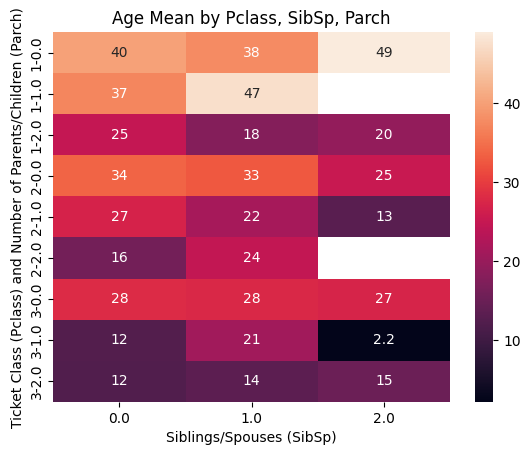

In [39]:
sns.heatmap(train_crosstab1, annot=True)
plt.title("Age Mean by Pclass, SibSp, Parch")
plt.xlabel("Siblings/Spouses (SibSp)")
plt.ylabel("Ticket Class (Pclass) and Number of Parents/Children (Parch)")
plt.show()

Maximum Age mean for first class and no parents/children, minimum for third class and 1 parent/children on board

# [](http://)Data preparation

In [40]:
# check yes/no in the dataset
# APPLYMAP IS MAP 
yes_no_present = final_train.map(lambda x : x in ['yes','no']).any().any()
print(yes_no_present)

# If present check for column 
# also keep in mind for case sensitive

False


In [41]:
# column name with yes or no
columns_with_yes_no = final_train.columns[final_train.apply(lambda col: col.astype(str).str.lower().isin(['yes','no'])).all()]
print(columns_with_yes_no)

Index([], dtype='object')


In [42]:
# convert male to 0 and female to 1
final_train['Sex'] = final_train['Sex'].map({'male':0, 'female':1})

In [43]:
# convert to binary
# C = Cherbourg, Q = Queenstown, S = Southampton
# 0 = c, 1 = Q, 2 = S
final_train['Embarked'] = final_train['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [44]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    int64  
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    float64
 5   Parch     712 non-null    float64
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 50.1 KB


## Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# putting feature variable to X
X = final_train.drop(['Survived'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.0,1.0,0.0,7.250,2
2,1,1,38.0,1.0,0.0,13.000,0
3,3,1,26.0,0.0,0.0,7.925,2
4,1,1,35.0,1.0,0.0,53.100,2
5,3,0,35.0,0.0,0.0,8.050,2


In [47]:
# putting output variable to y
y = final_train['Survived']

In [48]:
# spitting the data into train test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [49]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
520,3,0,32.0,0.0,0.0,7.8958,2
890,1,0,26.0,0.0,0.0,30.0000,0
622,1,0,42.0,1.0,0.0,52.5542,2
142,3,1,22.0,0.0,0.0,7.7500,2
716,3,0,19.0,0.0,0.0,7.6500,2


# [](http://)Model

## Desicion Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6, None],          # Depth of the tree
    'min_samples_split': [2, 3, 5, 8],       # Minimum samples to split an internal node
    'min_samples_leaf': [1, 5, 10],          # Minimum samples in a leaf node
    'max_features': [None, 'sqrt', 'log2']   # Number of features to consider at each split
}

# Initialize the model
tree_model = DecisionTreeRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, 
                           scoring='r2', cv=5, verbose=1, n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best R² score:", grid_search.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best R² score: 0.4263297680595767


## Residual

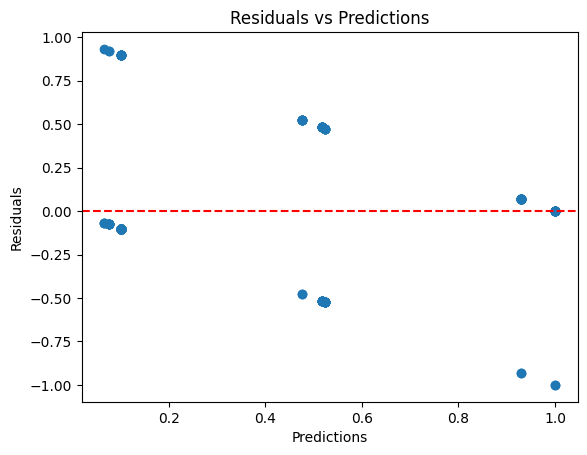

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

y_pred = grid_search.best_estimator_.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predictions")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

In [52]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 0.26
R² Score: 0.40


## Test Data

In [53]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
test_data.set_index('PassengerId', inplace=True)


# Removing column "Name" as PassengerId is tagged along 
test_data.drop(['Name', 'Ticket', 'Cabin'],axis=1,inplace=True)



# convert male to 0 and female to 1
test_data['Sex'] =test_data['Sex'].map({'male':0, 'female':1})

# convert to binary
# C = Cherbourg, Q = Queenstown, S = Southampton
# 0 = c, 1 = Q, 2 = S
test_data['Embarked'] = test_data['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [76]:
for col in test_data.columns:
    if test_data[col].isnull().sum()> 0:
        print(col)

Age
Fare


In [77]:
for col in test_data.columns:
    if test_data[col].isnull().sum()> 0:
        val_to_replace = test_data[col].median()
        test_data.fillna({col: val_to_replace}, inplace=True)
# checking for nan values
round(((test_data.isnull().sum())/len(test_data.index))*100,4)

Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [78]:
# predict
y_test_data_predict = grid_search.predict(test_data)

In [79]:
test_data.reset_index(level=0, inplace=True)

In [81]:
result = pd.concat([test_data, pd.Series(y_test_data_predict)], axis=1)

In [84]:
result.rename(columns={result.columns[-1]:'Survived'}, inplace=True)
result['Survived'] =(result['Survived']>=0.5).astype(int)
result.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,0,34.5,0,0,7.8292,1,0
1,893,3,1,47.0,1,0,7.0000,2,1
2,894,2,0,62.0,0,0,9.6875,1,0
3,895,3,0,27.0,0,0,8.6625,2,0
4,896,3,1,22.0,1,1,12.2875,2,1


In [85]:
final_result = result[['PassengerId','Survived']]
final_result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [87]:
final_result.to_csv('Submission.csv', index=False)

In [55]:
import statsmodels.api as sm

In [56]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the regression Model by OLS
lr_1 = sm.OLS(y_train, X_train_sm)
lr_model_1 = lr_1.fit()
lr_model_1.params

const       0.917118
Pclass     -0.223057
Sex         0.459474
Age        -0.005000
SibSp       0.020275
Parch      -0.014569
Fare       -0.000603
Embarked   -0.019705
dtype: float64

In [57]:
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     46.67
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           1.30e-50
Time:                        10:43:34   Log-Likelihood:                -223.57
No. Observations:                 498   AIC:                             463.1
Df Residuals:                     490   BIC:                             496.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9171      0.103      8.937      0.0

1. R square and F-statistic low
2. p value more for SibSp, Parch, Fare, Embarked
3. p value zer for Pclass, Sex, Age
4. R square is 0.4, meaninf 40% of variance in Survived explained
5. Intercept (const): The baseline survival rate (when all other variables are zero) is about 0.398, highly significant (p < 0.001).
6. Pclass(0,1,2) coef is negative , increasing class decreases chances of survival
7. Sex(0(male), female(1))- coef is positive 0 being less survival female being more chance
8. Age- increasing age decreasing survival rate


In [58]:
#checking vifs
from statsmodels.stats.outliers_influence import variance_inflation_factor

Dropping variables
1. high p value & high vif
2. high p value anf low vif
3. low p value and high vifgh VIF.

VIF ELIMINATION
1. VIF > 10, then we should definitely eliminate the variable.
2. VIF > 5, We need to inspect the variable before eliminating it.
3. VIF < 5, is definitely a good variable and we should not eliminate it.
4. p value> 0.05 highpeat


In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Embarked,5.39
0,Pclass,4.84
2,Age,4.08
5,Fare,2.95
1,Sex,1.65
4,Parch,1.62
3,SibSp,1.48


In [60]:
# dropping variables with high p-values FARE wiht 0.68
X_lr = X_train.drop('Fare', axis=1)

In [61]:
# Build a second fitted model

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_lr)
# Fit the regression Model by OLS
lr_2 = sm.OLS(y_train, X_train_sm)
lr_model_2 = lr_2.fit()
# summary of the model
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     54.51
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           1.83e-51
Time:                        10:43:34   Log-Likelihood:                -223.65
No. Observations:                 498   AIC:                             461.3
Df Residuals:                     491   BIC:                             490.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8976      0.091      9.857      0.0

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_lr.columns
vif['VIF'] = [variance_inflation_factor(X_lr.values, i) for i in range (X_lr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Embarked,5.29
0,Pclass,4.83
2,Age,3.51
1,Sex,1.63
4,Parch,1.46
3,SibSp,1.42


In [63]:
# dropping SibSp high p value (0.567) and low vif (1.47)
X_lr_1= X_lr.drop('SibSp', axis=1)

In [64]:
# Build a thrid fitted model

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_lr_1)
# Fit the regression Model by OLS
lr_3 = sm.OLS(y_train, X_train_sm)
lr_model_3 = lr_3.fit()
# summary of the model
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     65.44
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           2.52e-52
Time:                        10:43:34   Log-Likelihood:                -223.82
No. Observations:                 498   AIC:                             459.6
Df Residuals:                     492   BIC:                             484.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9084      0.089     10.199      0.0

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_lr_1.columns
vif['VIF'] = [variance_inflation_factor(X_lr_1.values, i) for i in range (X_lr_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Embarked,5.29
0,Pclass,4.83
2,Age,3.34
1,Sex,1.58
3,Parch,1.41


In [66]:
# drop Parch as high p value anf low vif
X_lr_2= X_lr_1.drop('Parch', axis=1)

In [67]:
# Build a fourth fitted model

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_lr_2)
# Fit the regression Model by OLS
lr_4 = sm.OLS(y_train, X_train_sm)
lr_model_4 = lr_4.fit()
# summary of the model
print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     81.86
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           2.97e-53
Time:                        10:43:34   Log-Likelihood:                -223.95
No. Observations:                 498   AIC:                             457.9
Df Residuals:                     493   BIC:                             479.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8929      0.084     10.665      0.0

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_lr_2.columns
vif['VIF'] = [variance_inflation_factor(X_lr_2.values, i) for i in range (X_lr_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Embarked,5.17
0,Pclass,4.74
2,Age,3.20
1,Sex,1.41


In [69]:
# drop Embarked as high p value anf low vif
X_lr_3= X_lr_2.drop('Embarked', axis=1)

In [70]:
# Build a fifth fitted model

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_lr_3)
# Fit the regression Model by OLS
lr_5 = sm.OLS(y_train, X_train_sm)
lr_model_5 = lr_5.fit()
# summary of the model
print(lr_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     108.9
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           4.02e-54
Time:                        10:43:35   Log-Likelihood:                -224.39
No. Observations:                 498   AIC:                             456.8
Df Residuals:                     494   BIC:                             473.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8719      0.081     10.817      0.0

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_lr_3.columns
vif['VIF'] = [variance_inflation_factor(X_lr_3.values, i) for i in range (X_lr_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Pclass,2.71
2,Age,2.68
1,Sex,1.41


In [72]:
# Residual Analysis of the train data
y_train_1 = lr_model_5.predict(X_train_sm)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


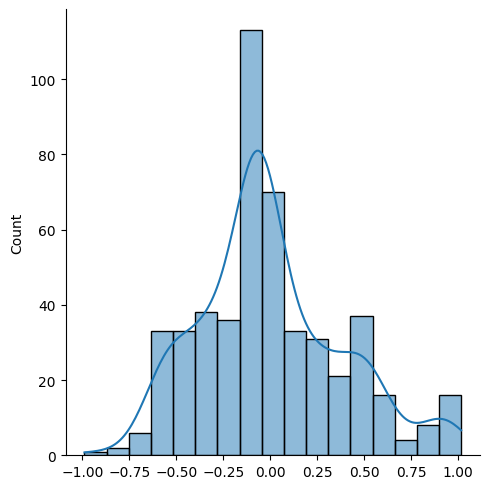

In [73]:
res = y_train - y_train_1
sns.displot(res, kde=True)
plt.show()

In [74]:
# TEST DATA

In [75]:
# making prediction using final model

# applying scaling on test data
# Select only numeric columns (int and float types)
test_data_lr = test_data
test_data_lr.set_index('PassengerId', inplace=True)
numeric_cols = test_data.select_dtypes(include=['float64', 'int64']).columns

# apply fit.transform only to selected columns only
test_data_lr[numeric_cols] = scaler.fit_transform(test_data_lr[numeric_cols])

test_data_lr.head()

KeyError: "None of ['PassengerId'] are in the columns"

In [ ]:
# adding constatn variable to test dataframe
X_test = sm.add_constant(test_data_lr)
X_test.drop(['Fare','SibSp','Parch','Embarked','Name','Ticket','Cabin'], axis=1, inplace=True)

In [ ]:
# convert male to 0 and female to 1
X_test['Sex'] = X_test['Sex'].map({'male':0, 'female':1})

In [ ]:
X_test

In [ ]:
#making prediction using fourth model
y_pred = lr_model_5.predict(X_test)

In [ ]:
result = pd.concat([X_test, y_pred], axis=1)

In [ ]:
result.rename(columns={result.columns[-1]:'Survived'}, inplace=True)
result

In [ ]:

result['Survived'] = round(result['Survived'],1)
result['Survived'] =(result['Survived']>=0.5).astype(int)
result.head()

In [ ]:
final_result = result.drop(['const','Pclass','Sex','Age'], axis=1)
final_result.head()

In [ ]:
final_result.reset_index(inplace=True)
final_result.head()

In [ ]:
final_result.to_csv(r'D:\Niku_OneDrive\skill\Kaggle\TITANIC\submission_mlr1.csv')